In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks/Hands-On Predictive Analysis with Python Workshop/Week 2 - Project/Restaurant Revenue Prediction

/content/gdrive/MyDrive/Colab Notebooks/Hands-On Predictive Analysis with Python Workshop/Week 2 - Project/Restaurant Revenue Prediction


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#import the dataset
restaurants = pd.read_csv('train.csv')

#preprocessing... 
restaurants.drop('Id', axis = 1, inplace=True)
restaurants['Open Date'] = abs((pd.to_datetime(list(restaurants['Open Date'])) - pd.to_datetime('today').normalize()).days)
restaurants = pd.get_dummies(restaurants)

In [ ]:
X_features = list(restaurants.columns)
X_features.remove('revenue')

X = restaurants.loc[:, X_features].values
y = restaurants['revenue'].values

#Feature scaling...
mms = MinMaxScaler()
X = np.array(mms.fit_transform(X))

#normalize y so that the errors follow a normal distribution (necessary for regression)
y = [(revenue - min(y))/(max(y) - min(y)) for revenue in y]

In [ ]:
results = {}

def regression(regressor, X=X, y=y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  se = np.array(y_test - y_pred)**2
  return se.mean()
  

#Linear Regression

In [ ]:
lr = LinearRegression()
results['Linear'] = regression(lr)
print('Linear:', results['Linear'])

Linear: 0.0510326342943509


#Polynomial Regression

In [ ]:
p_lr = LinearRegression()
results['Poly'] = regression(p_lr, PolynomialFeatures(degree = 2).fit_transform(X))
print('Poly:', results['Poly'])

Poly: 0.09030431803533778


#Decision Tree Regression

In [ ]:
dtr = DecisionTreeRegressor()
results['Decision Tree'] = regression(dtr)
print('Decision Tree:', results['Decision Tree'])

Decision Tree: 0.03106029525414744


#Random Forest Regression

In [ ]:
rf = RandomForestRegressor()
results['Random Forest (all features)'] = regression(rf)
print('Random Forest (all features):', results['Random Forest (all features)'])

feature_importances = rf.feature_importances_[rf.feature_importances_ > np.percentile(rf.feature_importances_, 90)]
important_features = [X_features[np.where(rf.feature_importances_ == f_i)[0][0]] for f_i in feature_importances]

X_imp = restaurants.loc[:, important_features].values
rf_imp = RandomForestRegressor()
results['Random Forest (important features)'] = regression(rf_imp, X_imp)
print('\nRandom Forest (important features):', results['Random Forest (important features)'])

Random Forest (all features): 0.025995926353577475

Random Forest (important features): 0.027671031055839474


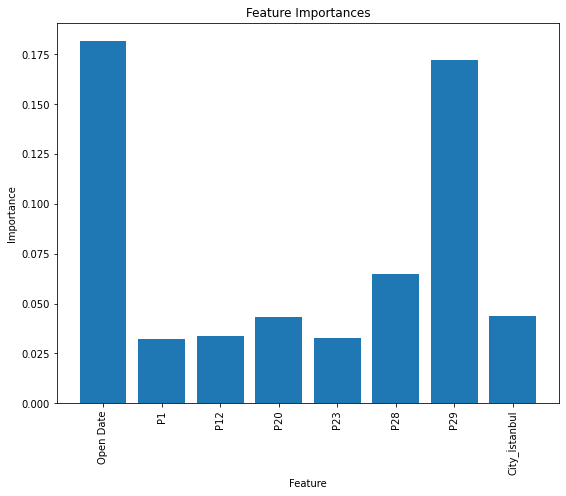

In [ ]:
plt.figure(figsize = (9,7))
x_values = list(range(len(feature_importances)))
plt.bar(x_values, feature_importances, orientation = 'vertical')
plt.xticks(x_values, important_features, rotation='vertical')

plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Feature Importances');

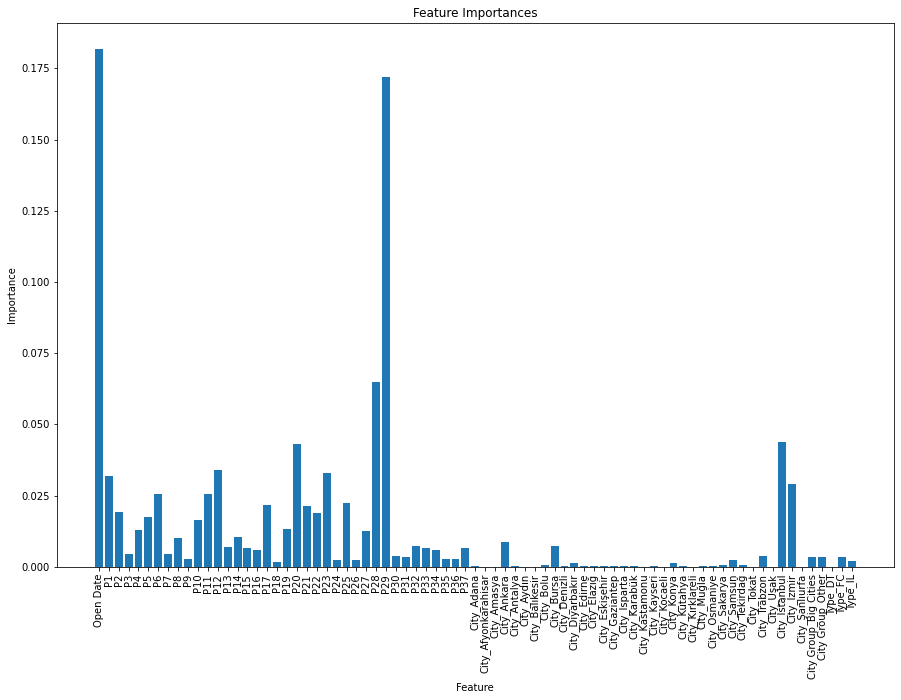

In [ ]:
plt.figure(figsize = (15,10))
x_values = list(range(len(X_features)))
plt.bar(x_values, rf.feature_importances_, orientation = 'vertical')
plt.xticks(x_values, X_features, rotation='vertical')

plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Feature Importances');